#### Застосування numpy

In [1]:
import matplotlib.pyplot as plt
import numpy as np

print("Setup complete")

Setup complete


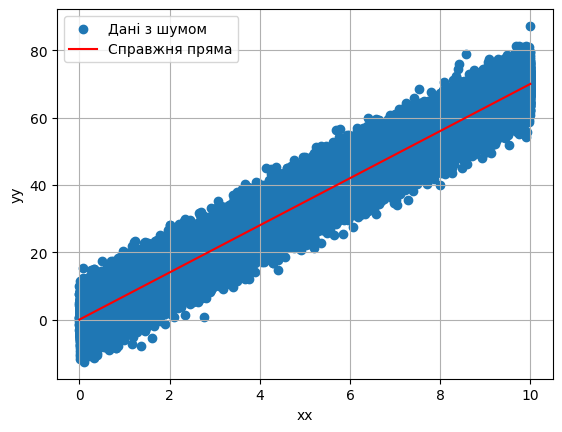

In [2]:
# Задані коефіцієнти прямої
kk = 7
bb = 0
N = 10_000_0
# Генеруємо значення xx
xx = np.linspace(0, 10, N)

# Генеруємо значення yy з шумом навколо прямої yy = kk * xx + bb
noise = np.random.normal(0, 4, N)
yy = kk * xx + bb + noise

# Відображення даних
plt.scatter(xx, yy, label='Дані з шумом')
plt.plot(xx, kk * xx + bb, color='red', label='Справжня пряма')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

1. Формула нахилу ( a ): a = n (∑ xy )−(∑ x )(∑ y ) / n (∑ x 2 )−(∑ x )2
2. Перетин ( b ) Формула: b =(∑ y )− a (∑ x ) / n
Де:
n – кількість точок даних,
∑ xy – сума добутку кожної пари значень x і y ,
∑ x – сума всіх значень x ,
∑ y – сума всіх значень y ,
∑ x 2 — сума квадратів значень x .

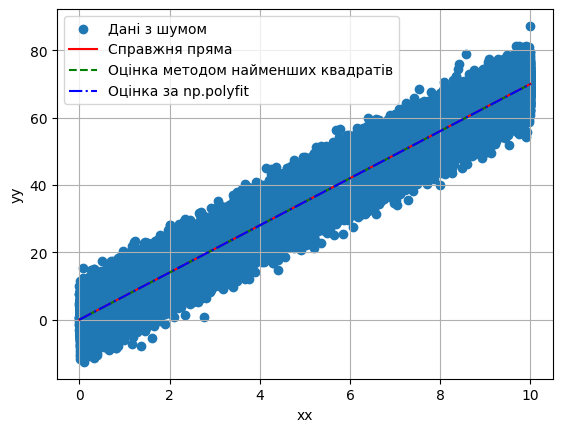

Параметри справжньої прямої:
kk = 7
bb = 0

Оцінки параметрів за методом найменших квадратів:
kk_hat = 6.998006957984829
bb_hat = -0.00872868496579118

Оцінки параметрів за np.polyfit:
kk_np_polyfit = 6.998006957984842
bb_np_polyfit = -0.008728684965773064


In [3]:
# Реалізація методу найменших квадратів
def least_squares_method(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_xx = np.sum(x * x)
    
    # Обчислюємо коефіцієнти прямої
    kk_hat1 = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x ** 2)
    bb_hat1 = (sum_y - kk_hat1 * sum_x) / n
    
    return kk_hat1, bb_hat1

# Знайдення оцінок коефіцієнтів за методом найменших квадратів
kk_hat, bb_hat = least_squares_method(xx, yy)

# Знайдення оцінок коефіцієнтів за допомогою np.polyfit
coefficients = np.polyfit(xx, yy, 1)
kk_np_polyfit = coefficients[0]
bb_np_polyfit = coefficients[1]

# Відображення знайдених оцінок лінії регресії
plt.scatter(xx, yy, label='Дані з шумом')
plt.plot(xx, kk * xx + bb, color='red', label='Справжня пряма')
plt.plot(xx, kk_hat * xx + bb_hat, color='green', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(xx, kk_np_polyfit * xx + bb_np_polyfit, color='blue', linestyle='-.', label='Оцінка за np.polyfit')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

print("Параметри справжньої прямої:")
print("kk =", kk)
print("bb =", bb)
print()
print("Оцінки параметрів за методом найменших квадратів:")
print("kk_hat =", kk_hat)
print("bb_hat =", bb_hat)
print()
print("Оцінки параметрів за np.polyfit:")
print("kk_np_polyfit =", kk_np_polyfit)
print("bb_np_polyfit =", bb_np_polyfit)

6.363782339845127 4.188447717355878


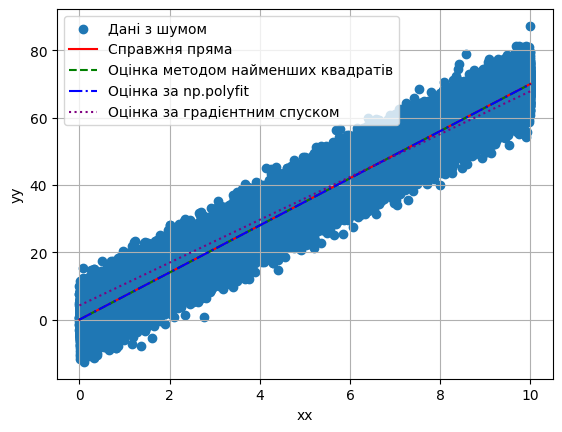

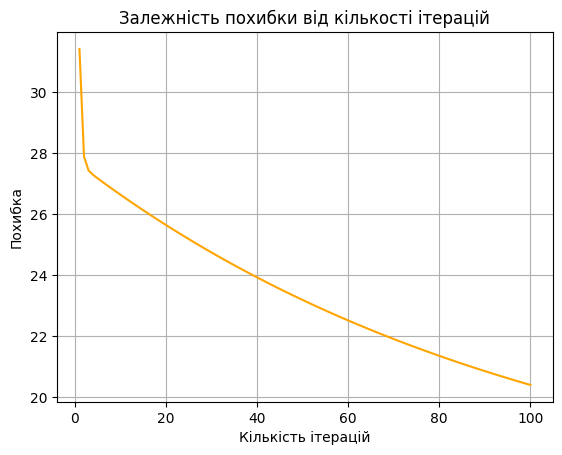

In [4]:
def gradient_descent(x, y, learning_rate1, n_iter1):
    # Початкові оцінки коефіцієнтів
    kk_hat1 = 7
    bb_hat1 = 7
    n = len(x)
    
    # Перевірка на валідність параметрів
    if n_iter1 <= 0 or learning_rate1 <= 0:
        raise ValueError("Параметри learning_rate та n_iter повинні бути більше 0")
    
    # Градієнтний спуск
    for _ in range(n_iter1):
        # Обчислення градієнтів
        y_pred = kk_hat1 * x + bb_hat1
        gradient_kk = (-2/n) * np.sum(x * (y - y_pred))
        gradient_bb = (-2/n) * np.sum(y - y_pred)

        # Оновлення параметрів
        kk_hat1 -= learning_rate1 * gradient_kk
        bb_hat1 -= learning_rate1 * gradient_bb
    
    return kk_hat1, bb_hat1

# Оптимальні параметри градієнтного спуску
learning_rate = 0.01
n_iter = 100

# Виклик функції градієнтного спуску
kk_gradient, bb_gradient = gradient_descent(xx, yy, learning_rate, n_iter)
print(kk_gradient, bb_gradient)

# Відображення знайдених оцінок лінії регресії разом з іншими
plt.scatter(xx, yy, label='Дані з шумом')
plt.plot(xx, kk * xx + bb, color='red', label='Справжня пряма')
plt.plot(xx, kk_hat * xx + bb_hat, color='green', linestyle='--', label='Оцінка методом найменших квадратів')
plt.plot(xx, kk_np_polyfit * xx + bb_np_polyfit, color='blue', linestyle='-.', label='Оцінка за np.polyfit')
plt.plot(xx, kk_gradient * xx + bb_gradient, color='purple', linestyle=':', label='Оцінка за градієнтним спуском')
plt.xlabel('xx')
plt.ylabel('yy')
plt.legend()
plt.grid(True)
plt.show()

# Функція втрат для градієнтного спуску
def loss_function(x, y, kk1, bb1):
    """обчислює середньоквадратичну помилку між прогнозованими значеннями y_pred та істинними значеннями y"""
    y_pred = kk1 * x + bb1
    return np.mean((y_pred - y) ** 2)


# Графік залежності похибки від кількості ітерацій
errors = []
iterations = range(1, n_iter + 1)
for i in iterations:
    kk_gradient, bb_gradient = gradient_descent(xx, yy, learning_rate, i)
    error = loss_function(xx, yy, kk_gradient, bb_gradient)
    errors.append(error)

plt.plot(iterations, errors, color='orange')
plt.xlabel('Кількість ітерацій')
plt.ylabel('Похибка')
plt.title('Залежність похибки від кількості ітерацій')
plt.grid(True)
plt.show()